In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv("PenyakitDaunTomat.csv")
df.head(20)

,Label,gaborenergy,gaborentropy,width,Height,area,perimeter,Extent,Solidity,Hull_Area,AspectRatio,Rectangularity,Circularity,EquiDimeter,RedMean,GreenMean,BlueMean,RedVar,BlueVar,GreenVar,contrast,correlation,inverse difference moments,entropy
0,1,0.734682,0.782968,256,29.969833,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,29.969833,36.552261,23.773621,38.642642,31.083274,45.910445,129.773684,0.961836,0.694171,5.099258
1,1,0.537922,1.314809,256,35.560440,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,35.560440,55.279739,34.950378,41.609554,40.552338,61.527606,147.773875,0.973126,0.640997,6.016298
2,1,0.582021,1.273272,256,26.412216,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,26.412216,47.042618,42.393951,38.081266,58.522267,63.883732,196.702455,0.965218,0.714059,5.004834
3,1,0.434674,1.692345,256,48.434387,33982.0,1810.406197,0.518524,0.522599,65025.0,1.000000,1.928550,96.450197,208.007755,48.434387,64.382538,50.287857,55.180451,56.023824,70.714487,292.733872,0.963872,0.613212,6.468218
4,1,0.629025,1.018491,2,39.405914,1.0,4.828427,0.166667,1.000000,1.0,0.666667,6.000000,23.313708,1.128379,39.405914,48.565567,30.798309,41.733953,32.981168,49.406060,126.232938,0.969823,0.594892,6.648578
5,1,0.556173,1.271998,256,39.078613,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,39.078613,48.808868,35.373795,48.145652,43.698361,58.768287,202.698567,0.964284,0.652963,5.778519
6,1,0.675236,0.939468,256,39.818939,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,39.818939,47.899826,28.387375,41.125433,32.551125,49.536388,142.017842,0.964256,0.592871,6.440544
7,1,0.649648,1.026431,256,33.188019,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,33.188019,45.794769,30.133102,40.487471,36.361693,53.212660,129.921654,0.970616,0.637515,6.172949
8,1,0.594523,1.134960,256,43.569519,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,43.569519,51.444107,34.939209,44.402515,36.264523,51.567173,192.724172,0.957180,0.599737,6.470551
9,1,0.666426,0.937668,256,36.632034,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,36.632034,42.883163,27.305649,42.749367,32.532955,49.005250,132.143675,0.967428,0.664254,5.654197


In [3]:
# Memisahkan Fitur dan Target
Fitur = df.drop('Label', axis=1)
Target = df['Label']

Fitur.head(10)

,gaborenergy,gaborentropy,width,Height,area,perimeter,Extent,Solidity,Hull_Area,AspectRatio,Rectangularity,Circularity,EquiDimeter,RedMean,GreenMean,BlueMean,RedVar,BlueVar,GreenVar,contrast,correlation,inverse difference moments,entropy
0,0.734682,0.782968,256,29.969833,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,29.969833,36.552261,23.773621,38.642642,31.083274,45.910445,129.773684,0.961836,0.694171,5.099258
1,0.537922,1.314809,256,35.560440,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,35.560440,55.279739,34.950378,41.609554,40.552338,61.527606,147.773875,0.973126,0.640997,6.016298
2,0.582021,1.273272,256,26.412216,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,26.412216,47.042618,42.393951,38.081266,58.522267,63.883732,196.702455,0.965218,0.714059,5.004834
3,0.434674,1.692345,256,48.434387,33982.0,1810.406197,0.518524,0.522599,65025.0,1.000000,1.928550,96.450197,208.007755,48.434387,64.382538,50.287857,55.180451,56.023824,70.714487,292.733872,0.963872,0.613212,6.468218
4,0.629025,1.018491,2,39.405914,1.0,4.828427,0.166667,1.000000,1.0,0.666667,6.000000,23.313708,1.128379,39.405914,48.565567,30.798309,41.733953,32.981168,49.406060,126.232938,0.969823,0.594892,6.648578
5,0.556173,1.271998,256,39.078613,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,39.078613,48.808868,35.373795,48.145652,43.698361,58.768287,202.698567,0.964284,0.652963,5.778519
6,0.675236,0.939468,256,39.818939,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,39.818939,47.899826,28.387375,41.125433,32.551125,49.536388,142.017842,0.964256,0.592871,6.440544
7,0.649648,1.026431,256,33.188019,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,33.188019,45.794769,30.133102,40.487471,36.361693,53.212660,129.921654,0.970616,0.637515,6.172949
8,0.594523,1.134960,256,43.569519,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,43.569519,51.444107,34.939209,44.402515,36.264523,51.567173,192.724172,0.957180,0.599737,6.470551
9,0.666426,0.937668,256,36.632034,65025.0,1020.000000,0.992203,1.000000,65025.0,1.000000,1.007859,16.000000,287.736688,36.632034,42.883163,27.305649,42.749367,32.532955,49.005250,132.143675,0.967428,0.664254,5.654197


In [4]:
# Menampilkan Missing Value per atribut
print("Missing value per atribut:")
print(Fitur.isnull().sum())

Missing value per atribut:
gaborenergy                   0
gaborentropy                  0
width                         0
Height                        0
area                          0
perimeter                     0
Extent                        0
Solidity                      0
Hull_Area                     0
AspectRatio                   0
Rectangularity                0
Circularity                   0
EquiDimeter                   0
RedMean                       0
GreenMean                     0
BlueMean                      0
RedVar                        0
BlueVar                       0
GreenVar                      0
contrast                      0
correlation                   0
inverse difference moments    0
entropy                       0
dtype: int64


In [5]:
# Menampilkan baris yang duplikat
duplikat = Fitur[Fitur.duplicated()]
print("Data duplikat:")
print(duplikat)

Data duplikat:
Empty DataFrame
Columns: [gaborenergy, gaborentropy, width, Height, area, perimeter, Extent, Solidity, Hull_Area, AspectRatio, Rectangularity, Circularity, EquiDimeter, RedMean, GreenMean, BlueMean, RedVar, BlueVar, GreenVar, contrast, correlation, inverse difference moments, entropy]
Index: []


In [6]:
scaler = StandardScaler()
Fitur_Normalisasi = scaler.fit_transform(Fitur)
Fitur_Normalisasi = pd.DataFrame(Fitur_Normalisasi, columns=Fitur.columns)
Fitur_Normalisasi.head(10)

,gaborenergy,gaborentropy,width,Height,area,perimeter,Extent,Solidity,Hull_Area,AspectRatio,Rectangularity,Circularity,EquiDimeter,RedMean,GreenMean,BlueMean,RedVar,BlueVar,GreenVar,contrast,correlation,inverse difference moments,entropy
0,1.030686,-1.345200,0.328969,0.263436,0.395862,0.138149,0.399013,0.300861,0.333575,-0.093610,-0.217437,-0.263760,0.373523,0.263436,-0.613304,-0.748777,-0.048588,-1.446649,-1.574763,-1.141112,0.468315,-0.221066,0.099313
1,-0.709018,0.357265,0.328969,0.790648,0.395862,0.138149,0.399013,0.300861,0.333575,-0.093610,-0.217437,-0.263760,0.373523,0.790648,0.617846,0.072265,0.301551,-0.616782,-0.018768,-0.944289,1.271346,-0.849895,0.799752
2,-0.319107,0.224304,0.328969,-0.072059,0.395862,0.138149,0.399013,0.300861,0.333575,-0.093610,-0.217437,-0.263760,0.373523,-0.072059,0.076336,0.619067,-0.114839,0.958099,0.215981,-0.409280,0.708928,0.014127,0.027192
3,-1.621910,1.565788,0.328969,2.004702,-1.175713,2.378532,-2.109905,-3.443022,0.333575,-0.093610,0.913458,4.124851,-0.602142,2.004702,1.216267,1.198951,1.903118,0.739136,0.896554,0.640774,0.613133,-1.178487,1.144930
4,0.096495,-0.591271,-3.263690,1.153288,-2.896026,-2.739324,-3.973578,0.300861,-3.057784,-1.142248,5.914458,0.135208,-3.133781,1.153288,0.176455,-0.232745,0.316232,-1.280318,-1.226482,-1.179828,1.036443,-1.395131,1.282690
5,-0.547641,0.220224,0.328969,1.122423,0.395862,0.138149,0.399013,0.300861,0.333575,-0.093610,-0.217437,-0.263760,0.373523,1.122423,0.192449,0.103369,1.072908,-0.341065,-0.293689,-0.343716,0.642436,-0.708387,0.618135
6,0.505079,-0.844230,0.328969,1.192238,0.395862,0.138149,0.399013,0.300861,0.333575,-0.093610,-0.217437,-0.263760,0.373523,1.192238,0.132689,-0.409852,0.244418,-1.318007,-1.213497,-1.007228,0.640467,-1.419029,1.123792
7,0.278833,-0.565853,0.328969,0.566921,0.395862,0.138149,0.399013,0.300861,0.333575,-0.093610,-0.217437,-0.263760,0.373523,0.566921,-0.005698,-0.281611,0.169129,-0.984050,-0.847217,-1.139494,1.092826,-0.891075,0.919403
8,-0.208563,-0.218443,0.328969,1.545929,0.395862,0.138149,0.399013,0.300861,0.333575,-0.093610,-0.217437,-0.263760,0.373523,1.545929,0.365691,0.071444,0.631162,-0.992566,-1.011162,-0.452780,0.137187,-1.337832,1.146712
9,0.427186,-0.849993,0.328969,0.891703,0.395862,0.138149,0.399013,0.300861,0.333575,-0.093610,-0.217437,-0.263760,0.373523,0.891703,-0.197108,-0.489315,0.436066,-1.319600,-1.266416,-1.115197,0.866111,-0.574869,0.523178


In [7]:
pd.set_option("display.float_format", "{:.3f}".format)
Fitur_Normalisasi.describe()

,gaborenergy,gaborentropy,width,Height,area,perimeter,Extent,Solidity,Hull_Area,AspectRatio,Rectangularity,Circularity,EquiDimeter,RedMean,GreenMean,BlueMean,RedVar,BlueVar,GreenVar,contrast,correlation,inverse difference moments,entropy
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-3.272,-2.453,-3.278,-2.306,-2.896,-2.753,-4.856,-7.541,-3.058,-2.272,-1.455,-1.137,-3.148,-2.306,-2.164,-1.711,-3.576,-1.921,-2.822,-1.862,-5.729,-3.664,-2.881
25%,-0.728,-0.765,0.329,-0.758,0.396,0.138,0.399,0.301,0.334,-0.094,-0.217,-0.264,0.374,-0.758,-0.747,-0.741,-0.732,-0.752,-0.717,-0.703,-0.641,-0.709,-0.675
50%,0.015,-0.007,0.329,-0.050,0.396,0.138,0.399,0.301,0.334,-0.094,-0.217,-0.264,0.374,-0.050,-0.060,-0.122,0.009,-0.117,-0.045,-0.207,0.117,0.025,0.007
75%,0.775,0.716,0.329,0.675,0.396,0.138,0.399,0.301,0.334,-0.094,-0.217,-0.264,0.374,0.675,0.616,0.585,0.677,0.618,0.636,0.605,0.752,0.686,0.709
max,2.344,3.964,0.329,5.468,0.396,3.643,0.399,0.301,0.334,15.636,20.654,9.154,0.374,5.468,4.910,4.504,4.814,3.569,3.377,3.984,1.960,2.679,3.608


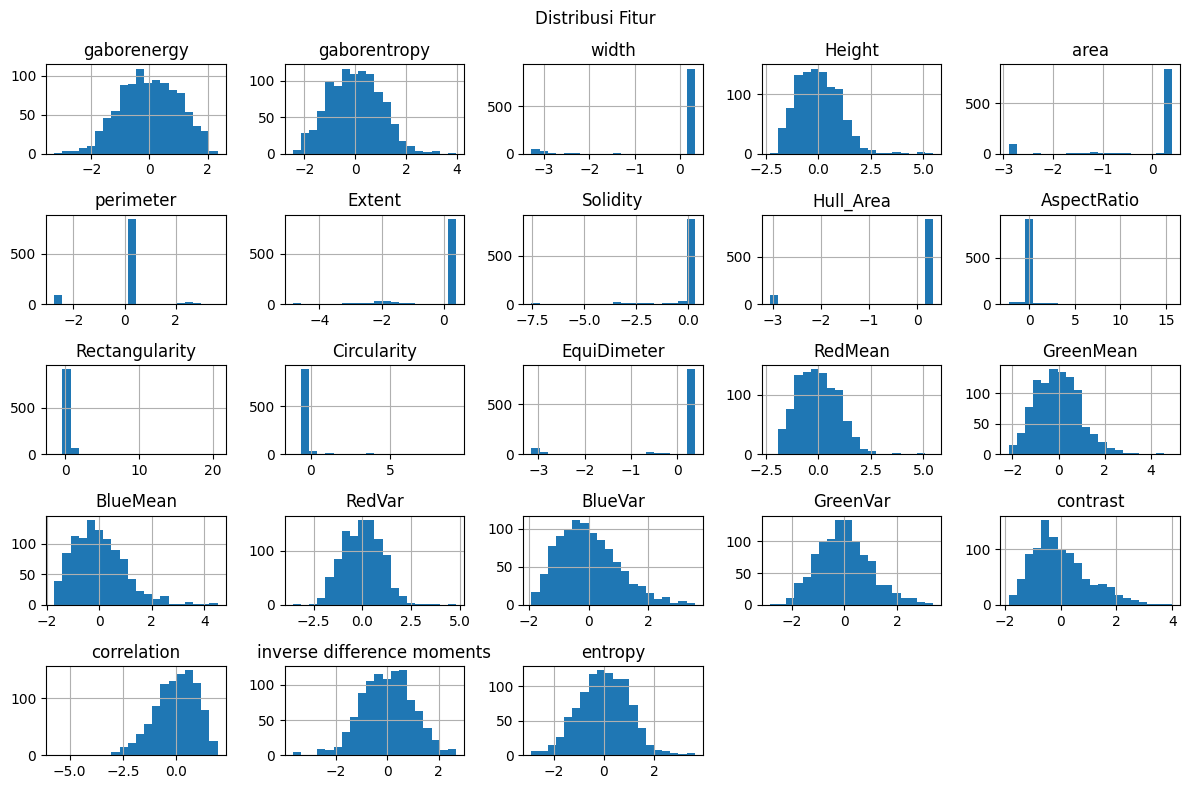

In [8]:
# Histogram per fitur
Fitur_Normalisasi.hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribusi Fitur")
plt.tight_layout()
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Fitur_Normalisasi, Target, test_size=0.3, random_state=0)

Akurasi: 32.33333333333333

Classification Report:

                        precision    recall  f1-score   support

               Healthy       0.33      0.36      0.35        33
        Bacterial_spot       0.47      0.59      0.52        27
          Early_blight       0.19      0.24      0.21        21
           Late_blight       0.09      0.10      0.10        29
             Leaf_Mold       0.23      0.18      0.20        34
    Septoria_leaf_spot       0.18      0.21      0.19        28
          Spider_mites       0.31      0.32      0.32        31
           Target_Spot       0.38      0.29      0.33        34
          mosaic_virus       0.59      0.92      0.72        26
Yellow_Leaf_Curl_Virus       0.45      0.14      0.21        37

              accuracy                           0.32       300
             macro avg       0.32      0.34      0.31       300
          weighted avg       0.33      0.32      0.31       300



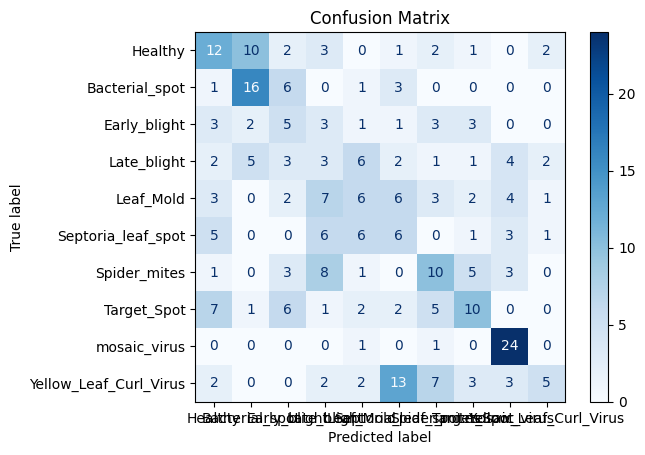

In [ ]:
Target_names = ['Healthy', 'Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites', 'Target_Spot', 'mosaic_virus', 'Yellow_Leaf_Curl_Virus']

# Latih model
clf = svm.SVC(kernel='poly', degree=3)
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Akurasi
print("Akurasi:", accuracy_score(y_test, y_pred) * 100)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=Target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()